In [11]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from typing import TypedDict, Annotated
from dotenv import load_dotenv

load_dotenv()

True

In [12]:
class ChatState(TypedDict):
    
    messages: Annotated[list[BaseMessage], add_messages]

In [13]:
llm = ChatGroq(
    model= "llama-3.3-70b-versatile"
)

def chatnode(state: ChatState):

    #take user query from state
    messages = state['messages']


    #send to llm
    response = llm.invoke(messages)

    #response store in state
    return {'messages': [response]}

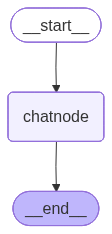

In [14]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node('chatnode', chatnode)

graph.add_edge(START, 'chatnode')
graph.add_edge('chatnode', END)

chatbot = graph.compile(checkpointer= checkpointer)
chatbot

In [ ]:
initial_state = {
    'messages': [HumanMessage(content="What is the capital of India?")]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is New Delhi.'

: 

In [15]:
thread_id = '1'

while True:

    user_message = input("Type here: ")

    print('USER:', user_message)
    
    if user_message.strip().lower() in ["exit", "quit", "bye"]:
        break

    config = {'configurable': {'thread_id': thread_id}}    
    response = chatbot.invoke({'messages': [HumanMessage(content= user_message)]}, config= config)

    print('AI:', response['messages'][-1].content)



USER: hi my name is Sharanch
AI: Hello Sharanch, it's nice to meet you. Is there something I can help you with or would you like to chat?
USER: what is my name?
AI: Your name is Sharanch.
USER: what is my name/
AI: Your name is Sharanch.
USER: bye


In [16]:
chatbot.get_state(config= config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is Sharanch', additional_kwargs={}, response_metadata={}, id='53950538-23ea-4ac6-8fb9-edda0d3756a2'), AIMessage(content="Hello Sharanch, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 41, 'total_tokens': 68, 'completion_time': 0.044169548, 'completion_tokens_details': None, 'prompt_time': 0.001974022, 'prompt_tokens_details': None, 'queue_time': 0.056329397, 'total_time': 0.04614357}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--bbb98e01-f59f-4e90-b282-aeb6052dc2a5-0', usage_metadata={'input_tokens': 41, 'output_tokens': 27, 'total_tokens': 68}), HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}, id='057df453-68d3-4762-9eff-152d76